# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In the Materials and methods section of the paper, I could read that the dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score,f1_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import auc as skl_auc
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
print(f"Shape of the Data: {df.shape}")
print("\n")

Shape of the Data: (41188, 21)




The data has 41188 rows and 21 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# rename some columns name with dots in it
df = df.rename(columns = {'emp.var.rate':'emp_var_rate', 'cons.price.idx':'cons_price_idx', 'cons.conf.idx':'cons_conf_idx', 'nr.employed':'nr_employed'})

# rename integer fields with the same suffix for clarity
# we also include here fields month and day_of_week as we will change the datatype of those columns to integer later below
df = df.rename(columns = {'age':'age_int', 'duration':'duration_int', 'campaign':'campaign_int', 'pdays':'pdays_int','previous':'previous_int', 'month':'month_int', 'day_of_week':'day_of_week_int'})

# rename float fields with the same suffix for clarity
df = df.rename(columns = {'emp_var_rate':'emp_var_rate_amount', 'cons_price_idx':'cons_price_idx_amount', 'cons_conf_idx':'cons_conf_idx_amount', 'euribor3m':'euribor3m_amount', 'nr_employed':'nr_employed_amount'})

# rename fields where answer is yes/no or unknow with the same suffix for clarity
df = df.rename(columns = {'default':'default_flag', 'housing':'housing_flag', 'loan':'loan_flag', 'y':'y_flag'})

# rename fields where answer is a category with the same suffix for clarity
df = df.rename(columns = {'job':'job_category', 'marital':'marital_category', 'education':'education_category', 'contact':'contact_category', 'poutcome':'poutcome_category'})


In [7]:
# Update the order of the columns
new_order = [ 'job_category', 'marital_category', 'education_category', 'contact_category','poutcome_category', 
    'default_flag', 'housing_flag', 'loan_flag', 'y_flag',
    'month_int', 'day_of_week_int', 'age_int', 'duration_int', 'campaign_int', 'pdays_int', 'previous_int',
    'emp_var_rate_amount', 'cons_price_idx_amount', 'cons_conf_idx_amount', 'euribor3m_amount', 'nr_employed_amount']
df = df[new_order]

In [8]:
#Are there any Null values in the data?
serie = df.isnull().sum()
serie

job_category             0
marital_category         0
education_category       0
contact_category         0
poutcome_category        0
default_flag             0
housing_flag             0
loan_flag                0
y_flag                   0
month_int                0
day_of_week_int          0
age_int                  0
duration_int             0
campaign_int             0
pdays_int                0
previous_int             0
emp_var_rate_amount      0
cons_price_idx_amount    0
cons_conf_idx_amount     0
euribor3m_amount         0
nr_employed_amount       0
dtype: int64

There are no null values in the data

In [9]:
# We check how imbalanced is the Output variable (desired target)
serie = df['y_flag'].value_counts(normalize = True)
serie

y_flag
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

We can see that about 11% of the class is yes so the class is imbalanced

In [10]:
# we check the list of unique values for each remaining categorical column:
print(f"1) Field job_category - list of unique values: {df.job_category.unique()}")
print(f"2) Field marital_category - list of unique values: {df.marital_category.unique()}")
print(f"3) Field education_category - list of unique values: {df.education_category.unique()}")
print(f"4) Field contact_category - list of unique values: {df.contact_category.unique()}")
print(f"5) Field poutcome_category - list of unique values: {df.poutcome_category.unique()}")
print(f"6) Field default_flag - list of unique values: {df.default_flag.unique()}")
print(f"7) Field housing_flag - list of unique values: {df.housing_flag.unique()}")
print(f"8) Field loan_flag - list of unique values: {df.loan_flag.unique()}")
print(f"9) Field y_flag - list of unique values: {df.y_flag.unique()}")
print(f"10) Field month_int - list of unique values: {df.month_int.unique()}")
print(f"11) Field day_of_week_int - list of unique values: {df.day_of_week_int.unique()}")

1) Field job_category - list of unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
2) Field marital_category - list of unique values: ['married' 'single' 'divorced' 'unknown']
3) Field education_category - list of unique values: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
4) Field contact_category - list of unique values: ['telephone' 'cellular']
5) Field poutcome_category - list of unique values: ['nonexistent' 'failure' 'success']
6) Field default_flag - list of unique values: ['no' 'unknown' 'yes']
7) Field housing_flag - list of unique values: ['no' 'yes' 'unknown']
8) Field loan_flag - list of unique values: ['no' 'yes' 'unknown']
9) Field y_flag - list of unique values: ['no' 'yes']
10) Field month_int - list of unique values: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
11) Field 

For fields default_flag, housing_flag, loan_flag, y_flag, we could consider changing the datatype of the columns to boolean since those are binary columns.
We would need to default value unknow to no
For fields month_int and day_of_week_int we could consider changing the datatype to integer after converting the values to integer

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

We will utilize the dataset related to marketing bank products via telephone.
The goal is to predict if a client will subscribe the deposit, which is a classification task.
The target variable is the column "y" of the original dataset : "has the client subscribed a term deposit?(binary: 'yes','no')". The input variables are all the other columns of the original dataset.
Since the target variable is binary (yes/no), this will be a binary classification problem.

For this problem, we want to compare the perforance of some classifications methods, including :
- K-nearest neighbors
- Logistic regression
- Decision trees
- Support vector machines

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:
# For fields default_flag, housing_flag, loan_flag, y_flag :
# We default the value "unknown" to 0, and change the value yes to 1 and no to 0
# Then we change the field type to integer
df.loc[df['default_flag'] == 'no', 'default_flag'] = False
df.loc[df['default_flag'] == 'yes', 'default_flag'] = True
df.loc[df['default_flag'] == 'unknown', 'default_flag'] = False
df['default_flag'] = df['default_flag'].astype(bool)

df.loc[df['housing_flag'] == 'no', 'housing_flag'] = False
df.loc[df['housing_flag'] == 'yes', 'housing_flag'] = True
df.loc[df['housing_flag'] == 'unknown', 'housing_flag'] = False
df['housing_flag'] = df['housing_flag'].astype(bool)

df.loc[df['loan_flag'] == 'no', 'loan_flag'] = False
df.loc[df['loan_flag'] == 'yes', 'loan_flag'] = True
df.loc[df['loan_flag'] == 'unknown', 'loan_flag'] = False
df['loan_flag'] = df['loan_flag'].astype(bool)

# The field y_flag doesn't have any value "unknown"
df.loc[df['y_flag'] == 'no', 'y_flag'] = False
df.loc[df['y_flag'] == 'yes', 'y_flag'] = True
df['y_flag'] = df['y_flag'].astype(bool)

# For fields job_category, marital_category, education_category we replace the value "unknow" by null
df.loc[df['job_category'] == 'unknown', 'job_category'] = np.nan
df.loc[df['marital_category'] == 'unknown', 'marital_category'] = np.nan
df.loc[df['education_category'] == 'unknown', 'education_category'] = np.nan

# For fields month_int and day_of_week_int:
# we replace values by integer values and change the datatype of the field to integer
df.loc[df['month_int'] == 'may', 'month_int'] = 5
df.loc[df['month_int'] == 'jun', 'month_int'] = 6
df.loc[df['month_int'] == 'jul', 'month_int'] = 7
df.loc[df['month_int'] == 'aug', 'month_int'] = 8
df.loc[df['month_int'] == 'oct', 'month_int'] = 10
df.loc[df['month_int'] == 'nov', 'month_int'] = 11
df.loc[df['month_int'] == 'dec', 'month_int'] = 12
df.loc[df['month_int'] == 'mar', 'month_int'] = 3
df.loc[df['month_int'] == 'apr', 'month_int'] = 4
df.loc[df['month_int'] == 'sep', 'month_int'] = 9
df['month_int'] = df['month_int'].astype(int)

df.loc[df['day_of_week_int'] == 'mon', 'day_of_week_int'] = 1
df.loc[df['day_of_week_int'] == 'tue', 'day_of_week_int'] = 2
df.loc[df['day_of_week_int'] == 'wed', 'day_of_week_int'] = 3
df.loc[df['day_of_week_int'] == 'thu', 'day_of_week_int'] = 4
df.loc[df['day_of_week_int'] == 'fri', 'day_of_week_int'] = 5
df['day_of_week_int'] = df['day_of_week_int'].astype(int)


In [12]:
# We also will want a general purpose pipeline that will one hot encode all the categorical features, and standard scale the numeric features. 
col_transformer = make_column_transformer((OneHotEncoder(drop = 'first'), make_column_selector(dtype_include=object)), remainder = StandardScaler())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   job_category           40858 non-null  object 
 1   marital_category       41108 non-null  object 
 2   education_category     39457 non-null  object 
 3   contact_category       41188 non-null  object 
 4   poutcome_category      41188 non-null  object 
 5   default_flag           41188 non-null  bool   
 6   housing_flag           41188 non-null  bool   
 7   loan_flag              41188 non-null  bool   
 8   y_flag                 41188 non-null  bool   
 9   month_int              41188 non-null  int32  
 10  day_of_week_int        41188 non-null  int32  
 11  age_int                41188 non-null  int64  
 12  duration_int           41188 non-null  int64  
 13  campaign_int           41188 non-null  int64  
 14  pdays_int              41188 non-null  int64  
 15  pr

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [14]:
X = df[[ 'job_category', 'marital_category', 'education_category', 'contact_category','poutcome_category', 
    'default_flag', 'housing_flag', 'loan_flag',
    'month_int', 'day_of_week_int', 'age_int', 'duration_int', 'campaign_int', 'pdays_int', 'previous_int',
    'emp_var_rate_amount', 'cons_price_idx_amount', 'cons_conf_idx_amount', 'euribor3m_amount', 'nr_employed_amount']]
y = df['y_flag']

# Divide the dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [15]:
# Besline Model: Dummy Classifier
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('dummy', DummyClassifier(strategy='most_frequent', random_state=42))
])
pipelined_model.fit(X_train, y_train)
y_pred = pipelined_model.predict(X_test)
pipelined_model

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019877CC7800>)])),
                ('dummy',
                 DummyClassifier(random_state=42, strategy='most_frequent'))])

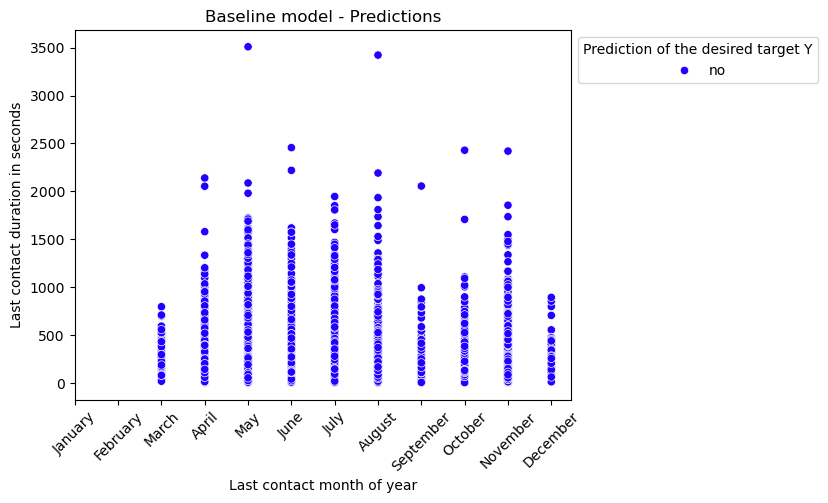

In [16]:
# In the paper from the UCI link above, it is mentioned that the call duration and month of contact are some important features.
# We will plot those 2 variables of the input data. 
# The color will indicate the prediction from the baseline model (yes or no)
plot = sns.scatterplot(data=X_test, x='month_int', y='duration_int', hue=y_pred, palette=["#2100ff"])
# Customize ticks
plt.title("Baseline model - Predictions")
plt.xlabel("Last contact month of year")
plt.ylabel("Last contact duration in seconds")
sns.move_legend(plot, "upper left", labels=["no"], bbox_to_anchor=(1, 1), title="Prediction of the desired target Y")
# Customize ticks
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           labels=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45)
# Save figure to PNG file
plt.savefig('images/Baseline model - Predictions.png', bbox_inches='tight')
plt.show()

We can visually observe that the baseline model return only a Prediction of the desired target Y which has value: no

In [17]:
# We print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94      7303
        True       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



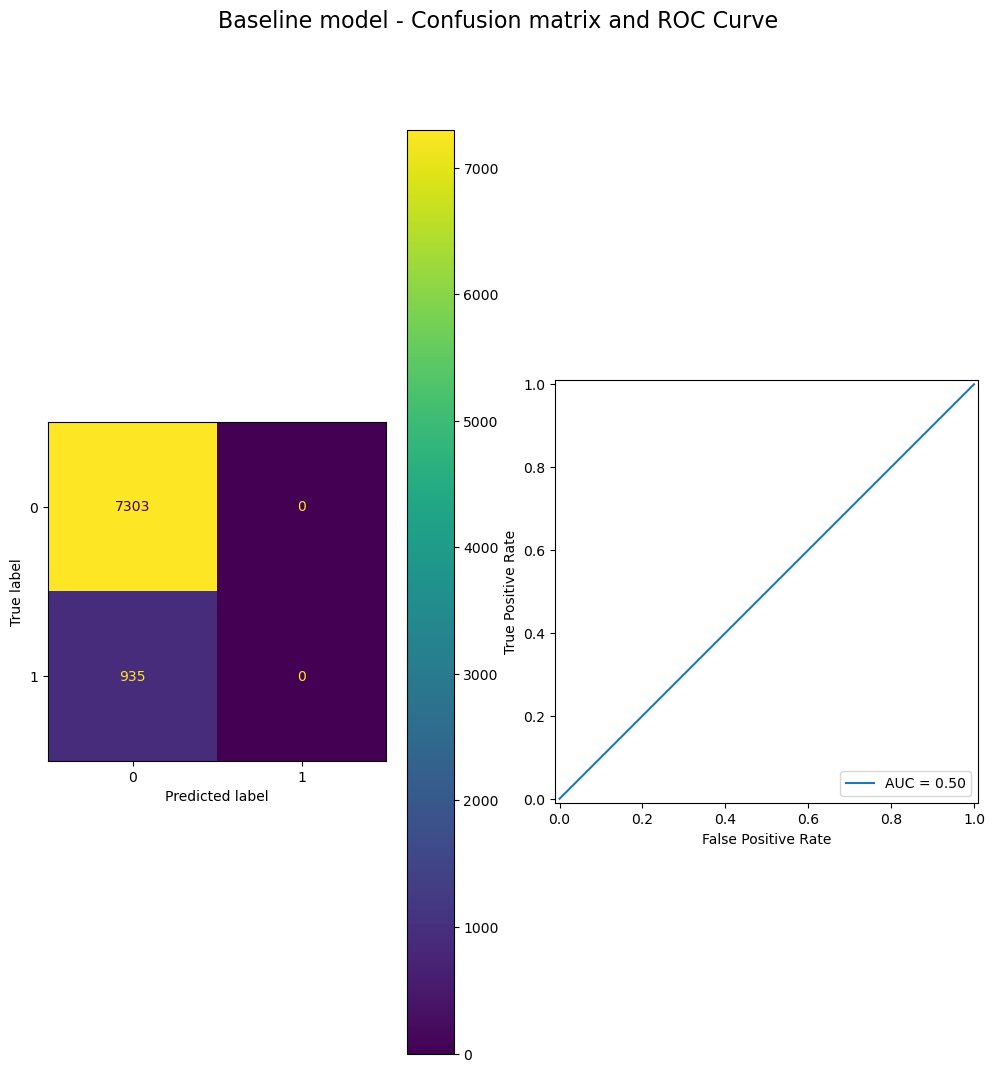

In [18]:
# We show the Confusion Matrix and ROC Curve for the baseline model
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 12)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax[0])

# ROC Curve
y_score = pipelined_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score, pos_label=1)
roc_auc_value = skl_auc(fpr, tpr)

disp2 = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_value)
disp2.plot(ax=ax[1])

fp = conf_matrix[0][1]
fn = conf_matrix[1][0]
auc = round(roc_auc_value, 2)
fig.suptitle('Baseline model - Confusion matrix and ROC Curve', fontsize=16)

# Save figure to PNG file
plt.savefig('images/Baseline model - Confusion matrix and ROC Curve.png', bbox_inches='tight')

In [19]:
bm_acc = pipelined_model.score(X_test, y_test)
bm_rec = recall_score(y_test, y_pred)
bm_f1 = f1_score(y_test, y_pred)

print(f"The baseline performance that our classifier should aim to beat has accuracy: {bm_acc}, recall: {bm_rec}, f1: {bm_f1}")

The baseline performance that our classifier should aim to beat has accuracy: 0.8865015780529255, recall: 0.0, f1: 0.0


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [20]:
# Model: Logistic Regression
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('lgr', LogisticRegression())
])
lgr_start = time.time()
pipelined_model.fit(X_train, y_train)
lgr_end = time.time()
y_pred = pipelined_model.predict(X_test)
pipelined_model

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019877CC7800>)])),
                ('lgr', LogisticRegression())])

### Problem 9: Score the Model

What is the accuracy of your model?

In [21]:
# We print the classification report
print(classification_report(y_test, y_pred))

lgr_train_acc = pipelined_model.score(X_train, y_train)
lgr_test_acc = pipelined_model.score(X_test, y_test)
lgr_fit_time = lgr_end - lgr_start

print(f"The Logistic Regression model train accuracy is: {lgr_train_acc}, and test accuracy is: {lgr_test_acc}")
print(f"The Logistic Regression model fit time is: {lgr_fit_time}")

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

The Logistic Regression model train accuracy is: 0.9106525037936267, and test accuracy is: 0.9098082058752124
The Logistic Regression model fit time is: 0.12107729911804199


We can see that this Logistic Regression model beat our baseline model performance.
Indeed the performance from our baseline model was: test accuracy: 0.8865015780529255, test recall: 0.0, test f1: 0.0

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [23]:
# Model: KNN
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier())
])
knn_start = time.time()
pipelined_model.fit(X_train, y_train)
knn_end = time.time()
y_pred = pipelined_model.predict(X_test)

# Calculating train accuracy, test accuracy and fit time
knn_train_acc = pipelined_model.score(X_train, y_train)
knn_test_acc = pipelined_model.score(X_test, y_test)
knn_fit_time = knn_end - knn_start

pipelined_model

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019877CC7800>)])),
                ('knn', KNeighborsClassifier())])

In [24]:
# Model: Decision Tree
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('dtc', DecisionTreeClassifier())
])
dtc_start = time.time()
pipelined_model.fit(X_train, y_train)
dtc_end = time.time()
y_pred = pipelined_model.predict(X_test)

# Calculating train accuracy, test accuracy and fit time
dtc_train_acc = pipelined_model.score(X_train, y_train)
dtc_test_acc = pipelined_model.score(X_test, y_test)
dtc_fit_time = dtc_end - dtc_start

pipelined_model

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019877CC7800>)])),
                ('dtc', DecisionTreeClassifier())])

In [25]:
# Model: SVM
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('svc', SVC())
])
svc_start = time.time()
pipelined_model.fit(X_train, y_train)
svc_end = time.time()
y_pred = pipelined_model.predict(X_test)

# Calculating train accuracy, test accuracy and fit time
svc_train_acc = pipelined_model.score(X_train, y_train)
svc_test_acc = pipelined_model.score(X_test, y_test)
svc_fit_time = svc_end - svc_start

pipelined_model

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019877CC7800>)])),
                ('svc', SVC())])

In [26]:
# Present the findings in a DataFrame
results_df = pd.DataFrame({'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVC'], 
              'Train Time' : [knn_fit_time, lgr_fit_time, dtc_fit_time, svc_fit_time],
              'Train Accuracy' : [knn_train_acc, lgr_train_acc, dtc_train_acc, svc_train_acc],
              'Test Accuracy' : [knn_test_acc, lgr_test_acc, dtc_test_acc, svc_test_acc]
                          }).set_index('Model')
results_df.head()

,Train Time,Train Accuracy,Test Accuracy
Model,,,
KNN,0.063229,0.927891,0.897427
Logistic Regression,0.121077,0.910653,0.909808
Decision Tree,0.192305,1.000000,0.890750
SVC,7.748383,0.919332,0.909323


When we compare the models, we can see that KNN, Logistic Regression and Decision Tree are all fast in term of train time. SVC is a bit slower.
Regarding train accuracy, the Decision Tree model has the best performance with a train accuracy of 100%. The other 3 models are quite similar with a train accuracy around 91 or 92%.
Regarding test accuracy, the Logistic Regression model and SVC model seem to have the best performance with a test accuracy close to 91%. 2nd is KNN model with test accuracy of 89.7% and last is the decision tree with test accuracy of 88.9%
If I had to pick one model, I would probably pick the logistic regression because it is fast to train and has one of the best test accuracy.
Also we noticed that all those models beat our baseline model performance. Indeed the performance from our baseline model was: test accuracy: 0.8865015780529255, test recall: 0.0, test f1: 0.0

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [27]:
# Model: KNN with hyperparameter tuning and grid search with scoring: accuracy
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier())
])

# GridSearchCV with scoring accuracy
param_grid_values = {
    'knn__n_neighbors': np.array(range(1, 100))
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "accuracy", 
                            cv=5
                           )
knn_start = time.time()
model_finder.fit(X_train, y_train)
knn_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [28]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
knn_fit_time = knn_end - knn_start
knn_params = model_finder.best_params_
knn_train_acc = best_model.score(X_train, y_train)
knn_test_acc = best_model.score(X_test, y_test)
knn_test_rec = recall_score(y_test, y_pred)
knn_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.98      0.95      7303
        True       0.66      0.35      0.46       935

    accuracy                           0.91      8238
   macro avg       0.79      0.66      0.70      8238
weighted avg       0.89      0.91      0.89      8238



In [29]:
# Model: Logistic Regression with hyperparameter tuning and grid search with scoring: accuracy
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('lgr', LogisticRegression())
])

# GridSearchCV with scoring accuracy
param_grid_values = {
    'lgr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lgr__class_weight': ['balanced', None],
    'lgr__C': [0.1, 1, 10],
    'lgr__solver': ['lbfgs', 'liblinear', 'saga'],
    'lgr__max_iter': [100, 1000]
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "accuracy", 
                            cv=5
                           )
lgr_start = time.time()
model_finder.fit(X_train, y_train)
lgr_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [30]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
lgr_fit_time = lgr_end - lgr_start
lgr_params = model_finder.best_params_
lgr_train_acc = best_model.score(X_train, y_train)
lgr_test_acc = best_model.score(X_test, y_test)
lgr_test_rec = recall_score(y_test, y_pred)
lgr_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



In [31]:
# Model: Decision Trees with hyperparameter tuning and grid search with scoring: accuracy
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('dtc', DecisionTreeClassifier())
])

# GridSearchCV with scoring accuracy
param_grid_values = {
    'dtc__criterion': ['entropy', 'gini'],
    'dtc__max_depth': [3, 5, 10, 20]
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "accuracy", 
                            cv=5
                           )
dtc_start = time.time()
model_finder.fit(X_train, y_train)
dtc_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [32]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
dtc_fit_time = dtc_end - dtc_start
dtc_params = model_finder.best_params_
dtc_train_acc = best_model.score(X_train, y_train)
dtc_test_acc = best_model.score(X_test, y_test)
dtc_test_rec = recall_score(y_test, y_pred)
dtc_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.94      0.97      0.95      7303
        True       0.66      0.51      0.57       935

    accuracy                           0.91      8238
   macro avg       0.80      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238



In [33]:
# Model: SVC with hyperparameter tuning and grid search with scoring: accuracy
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('svc', SVC())
])

# GridSearchCV with scoring accuracy
param_grid_values = {
    'svc__C': [0.1, 1],
    'svc__gamma': [0.1, 0.01],
    'svc__decision_function_shape': ['ovo', 'ovr'],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "accuracy", 
                            cv=5
                           )
svc_start = time.time()
model_finder.fit(X_train, y_train)
svc_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [35]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
svc_fit_time = svc_end - svc_start
svc_params = model_finder.best_params_
svc_train_acc = best_model.score(X_train, y_train)
svc_test_acc = best_model.score(X_test, y_test)
svc_test_rec = recall_score(y_test, y_pred)
svc_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [36]:
# Present the findings in a DataFrame for performance metric: accuracy
results_accuracy_df = pd.DataFrame({'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVC'],
              'Performance metric' : ['accuracy', 'accuracy', 'accuracy', 'accuracy'],                           
              'Train Time' : [knn_fit_time, lgr_fit_time, dtc_fit_time, svc_fit_time],
              'Best parameters' : [knn_params, lgr_params, dtc_params, svc_params],
              'Train Accuracy' : [knn_train_acc, lgr_train_acc, dtc_train_acc, svc_train_acc],
              'Test Accuracy' : [knn_test_acc, lgr_test_acc, dtc_test_acc, svc_test_acc],
              'Test Recall' : [knn_test_rec, lgr_test_rec, dtc_test_rec, svc_test_rec],
              'Test F1' : [knn_test_f1, lgr_test_f1, dtc_test_f1, svc_test_f1],
                          }).set_index(['Model', 'Performance metric'])

In [37]:
# We saw earlier that about 11% of the class is yes so the class is imbalanced
# Therefore we will try to use the performance metric F1 because it is more informative than simple accuracy

In [38]:
# Model: KNN with hyperparameter tuning and grid search with scoring: f1
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('knn', KNeighborsClassifier())
])

# GridSearchCV with scoring f1
param_grid_values = {
    'knn__n_neighbors': np.array(range(1, 100))
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "f1", 
                            cv=5
                           )
knn_start = time.time()
model_finder.fit(X_train, y_train)
knn_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [39]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
knn_fit_time = knn_end - knn_start
knn_params = model_finder.best_params_
knn_train_acc = best_model.score(X_train, y_train)
knn_test_acc = best_model.score(X_test, y_test)
knn_test_rec = recall_score(y_test, y_pred)
knn_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.96      0.94      7303
        True       0.57      0.41      0.47       935

    accuracy                           0.90      8238
   macro avg       0.75      0.68      0.71      8238
weighted avg       0.89      0.90      0.89      8238



In [40]:
# Model: Logistic Regression with hyperparameter tuning and grid search with scoring: f1
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('lgr', LogisticRegression())
])

# GridSearchCV with scoring f1
param_grid_values = {
    'lgr__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'lgr__class_weight': ['balanced', None],
    'lgr__C': [0.1, 1, 10],
    'lgr__solver': ['lbfgs', 'liblinear', 'saga'],
    'lgr__max_iter': [100, 1000]
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "f1", 
                            cv=5
                           )
lgr_start = time.time()
model_finder.fit(X_train, y_train)
lgr_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [41]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
lgr_fit_time = lgr_end - lgr_start
lgr_params = model_finder.best_params_
lgr_train_acc = best_model.score(X_train, y_train)
lgr_test_acc = best_model.score(X_test, y_test)
lgr_test_rec = recall_score(y_test, y_pred)
lgr_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      0.85      0.91      7303
        True       0.43      0.87      0.58       935

    accuracy                           0.86      8238
   macro avg       0.71      0.86      0.75      8238
weighted avg       0.92      0.86      0.88      8238



In [42]:
# Model: Decision Trees with hyperparameter tuning and grid search with scoring: f1
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('dtc', DecisionTreeClassifier())
])

# GridSearchCV with scoring f1
param_grid_values = {
    'dtc__criterion': ['entropy', 'gini'],
    'dtc__max_depth': [3, 5, 10, 20]
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "f1", 
                            cv=5
                           )
dtc_start = time.time()
model_finder.fit(X_train, y_train)
dtc_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [43]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
dtc_fit_time = dtc_end - dtc_start
dtc_params = model_finder.best_params_
dtc_train_acc = best_model.score(X_train, y_train)
dtc_test_acc = best_model.score(X_test, y_test)
dtc_test_rec = recall_score(y_test, y_pred)
dtc_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.95      0.95      0.95      7303
        True       0.60      0.59      0.60       935

    accuracy                           0.91      8238
   macro avg       0.77      0.77      0.77      8238
weighted avg       0.91      0.91      0.91      8238



In [44]:
# Model: SVC with hyperparameter tuning and grid search with scoring: f1
pipelined_model = Pipeline([
    ('col_transformer', col_transformer),
    ('svc', SVC())
])

# GridSearchCV with scoring f1
param_grid_values = {
    'svc__C': [0.1, 1],
    'svc__gamma': [0.1, 0.01],
    'svc__decision_function_shape': ['ovo', 'ovr'],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
model_finder = GridSearchCV(estimator = pipelined_model,
                            param_grid = param_grid_values,
                            scoring = "f1", 
                            cv=5
                           )
svc_start = time.time()
model_finder.fit(X_train, y_train)
svc_end = time.time()
best_model = model_finder.best_estimator_

# Evaluate the model
y_pred = best_model.predict(X_test)

In [45]:
# Calculate the train time, best parameters, train accuracy, test accuracy, test recall and test f1
svc_fit_time = svc_end - svc_start
svc_params = model_finder.best_params_
svc_train_acc = best_model.score(X_train, y_train)
svc_test_acc = best_model.score(X_test, y_test)
svc_test_rec = recall_score(y_test, y_pred)
svc_test_f1 = f1_score(y_test, y_pred)

# Show the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.97      0.95      7303
        True       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



In [46]:
# Present the findings in a DataFrame for performance metric: f1
results_f1_df = pd.DataFrame({'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'SVC'],
              'Performance metric' : ['f1', 'f1', 'f1', 'f1'],                           
              'Train Time' : [knn_fit_time, lgr_fit_time, dtc_fit_time, svc_fit_time],
              'Best parameters' : [knn_params, lgr_params, dtc_params, svc_params],
              'Train Accuracy' : [knn_train_acc, lgr_train_acc, dtc_train_acc, svc_train_acc],
              'Test Accuracy' : [knn_test_acc, lgr_test_acc, dtc_test_acc, svc_test_acc],
              'Test Recall' : [knn_test_rec, lgr_test_rec, dtc_test_rec, svc_test_rec],
              'Test F1' : [knn_test_f1, lgr_test_f1, dtc_test_f1, svc_test_f1],
                          }).set_index(['Model', 'Performance metric'])

# We combine the dataframe of the results for performance metric: accuracy 
# with the dataframe of the results for performance metric: f1
frames = [results_accuracy_df, results_f1_df]
results_final_df = pd.concat(frames)
results_final_df.head(10)

,,Train Time,Best parameters,Train Accuracy,Test Accuracy,Test Recall,Test F1
Model,Performance metric,,,,,,
KNN,accuracy,241.153090,{'knn__n_neighbors': 37},0.909287,0.905560,0.352941,0.458971
Logistic Regression,accuracy,823.207653,"{'lgr__C': 0.1, 'lgr__class_weight': None, 'lg...",0.910926,0.910051,0.412834,0.510245
Decision Tree,accuracy,5.288600,"{'dtc__criterion': 'entropy', 'dtc__max_depth'...",0.915842,0.914300,0.508021,0.573671
SVC,accuracy,1620.217573,"{'svc__C': 1, 'svc__decision_function_shape': ...",0.929196,0.910294,0.431016,0.521683
KNN,f1,273.164057,{'knn__n_neighbors': 5},0.927891,0.897427,0.406417,0.473520
Logistic Regression,f1,991.572517,"{'lgr__C': 1, 'lgr__class_weight': 'balanced',...",0.858179,0.856033,0.870588,0.578536
Decision Tree,f1,5.696827,"{'dtc__criterion': 'gini', 'dtc__max_depth': 3}",0.908619,0.908958,0.591444,0.595905
SVC,f1,1581.931995,"{'svc__C': 1, 'svc__decision_function_shape': ...",0.929196,0.910294,0.431016,0.521683


We noticed that all those improved models beat our baseline model performance. 
Indeed the performance from our baseline model was: test accuracy: 0.8865015780529255, test recall: 0.0, test f1: 0.0.
In term of test accuracy, the best improved model is the Decision Tree model with performance metric : accuracy.
In term of test recall, the best improved model is the Logistic Regression model with performance metric : f1.
In term of test F1, the best improved model is the Decision Tree model with performance metric : f1.
In term of train time, the best improved model is the Decision Tree model which is the fastest.

We saw earlier that about 11% of the data output class is yes so the class is imbalanced
Therefore it could be better to use the performance metric F1 as it is more informative than simple accuracy in that case.

So to conclude, I would recommend to choose the Decision Tree improved model with performance metric : f1.
It is also one of the fasted model to train.

##### Questions